# Copy files

Brief 1-2 sentence description of notebook.

TODO: Supplement the description
- Notebook that extracts the timestamps and gets the time that tones played

In [22]:
# Imports of all used packages and libraries
import sys
import os
import glob
from collections import defaultdict

In [23]:
import zipfile


# Functions

## Inputs & Data

- Explanation of each input and where it comes from.

Inputs and Required data loading
- input variable names are in all caps snake case
- Whenever an input changes or is used for processing 
- The variables are all lower in snake case

In [24]:
# Path of the directory that contains the Spike Gadgets recording and the exported timestamp files
# Exported with this tool https://docs.spikegadgets.com/en/latest/basic/ExportFunctions.html
# Export these files:
    # -raw – Continuous raw band export.
    # -dio – Digital IO channel state change export.
    # -analogio – Continuous analog IO export.
# INPUT_DIR = "/scratch/back_up/reward_competition_extention/final_proc/phy_curation"
# INPUT_DIR = "/scratch/back_up/reward_competition_extention/data/rce_cohort_3"
INPUT_DIR = "/orange/ruogu.fang/data/UKB/brain"
OUTPUT_DIR = os.path.join("/blue/ruogu.fang/ryoi360/projects/fmri_vlm/data/UKB/brain/20227_rsfMRI_NIFTI") # where data is saved should always be shown in the inputs
os.makedirs(OUTPUT_DIR, exist_ok=True)


# Processing

# Copying the files over

In [25]:
import shutil
import glob
import os



In [26]:

# for p in sorted(glob.glob('*/*/*.npy', recursive=True, root_dir=INPUT_DIR)):
#     if "copies" in p:
#         continue
#     print(p)
#     if os.path.isfile(os.path.join(INPUT_DIR, p)):
#         os.makedirs(os.path.join(OUTPUT_DIR, os.path.dirname(p)), exist_ok=True)
#         if not os.path.exists(os.path.join(OUTPUT_DIR, p)):
#             shutil.copy(os.path.join(INPUT_DIR, p), os.path.join(OUTPUT_DIR, p))
#         else:
#             print("{} exists".format(os.path.join(OUTPUT_DIR, p)))



In [30]:
import pandas as pd
import matplotlib.pyplot as plt


In [31]:
diagnosis_df = pd.read_pickle("./proc/trimmed_icd.pkl")

In [32]:
diagnosis_df

,eid,31-0.0,21022-0.0,all_diagnoses,mental_and_neural_diagnoses,has_any_diagnosis,has_mental_or_neural_diagnosis,has_PD,has_AD,has_BPD,has_SZ,has_ASD,has_MCI,has_MDD
0,1000014,1,63,"[I10, K20, K227, K30, K449, N300, R101, R31, R...",[],True,False,False,False,False,False,False,False,False
1,1000023,1,48,"[M179, N359, R31, Z302]",[],True,False,False,False,False,False,False,False,False
2,1000030,0,65,"[D051, D509, K224, K573, R69]",[],True,False,False,False,False,False,False,False,False
3,1000041,0,53,"[H269, H353, M2323]",[],True,False,False,False,False,False,False,False,False
4,1000059,0,48,[],[],False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
502304,6025359,1,62,"[I251, M4806, N40, N47, R798]",[],True,False,False,False,False,False,False,False,False
502305,6025362,0,53,"[M169, Z038]",[],True,False,False,False,False,False,False,False,False
502306,6025377,1,58,[],[],False,False,False,False,False,False,False,False,False
502307,6025386,0,43,[],[],False,False,False,False,False,False,False,False,False


(array([ 5479., 46284., 38405., 56933., 46975., 70839., 95647., 67889.,
        71436.,  2422.]),
 array([37. , 40.6, 44.2, 47.8, 51.4, 55. , 58.6, 62.2, 65.8, 69.4, 73. ]),
 <BarContainer object of 10 artists>)

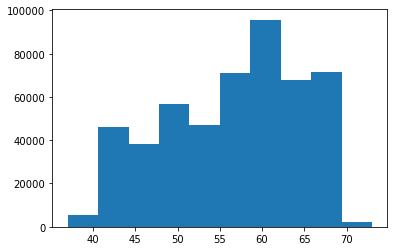

In [33]:
plt.hist(diagnosis_df["21022-0.0"])

(array([  3.,   1.,   6.,   8.,  14.,  34.,  69., 140., 203., 163.]),
 array([42. , 44.8, 47.6, 50.4, 53.2, 56. , 58.8, 61.6, 64.4, 67.2, 70. ]),
 <BarContainer object of 10 artists>)

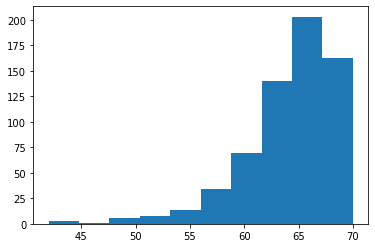

In [34]:
plt.hist(diagnosis_df[diagnosis_df["has_AD"]]["21022-0.0"])

In [71]:
filtered_diagnosis_df = diagnosis_df[(diagnosis_df["31-0.0"] == 0) & (diagnosis_df["21022-0.0"] >= 60) & (diagnosis_df["21022-0.0"] <= 70)]

(array([13490., 14359., 13704., 12647., 11888., 11261., 10259.,  9339.,
         8530.,  9190.]),
 array([60., 61., 62., 63., 64., 65., 66., 67., 68., 69., 70.]),
 <BarContainer object of 10 artists>)

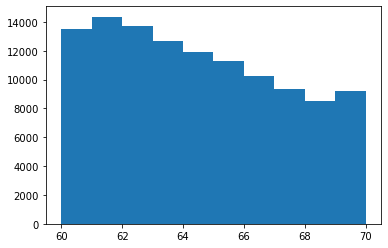

In [72]:
plt.hist(filtered_diagnosis_df["21022-0.0"])

(array([12., 19., 25., 21., 33., 35., 31., 41., 31., 39.]),
 array([60., 61., 62., 63., 64., 65., 66., 67., 68., 69., 70.]),
 <BarContainer object of 10 artists>)

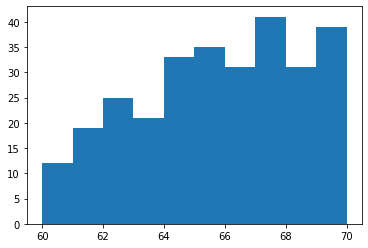

In [73]:
plt.hist(filtered_diagnosis_df[filtered_diagnosis_df["has_AD"]]["21022-0.0"])

In [74]:
has_columns = [col for col in filtered_diagnosis_df.columns if "has" in col] 


# filtered_diagnosis_df.head()

In [75]:
has_columns

['has_any_diagnosis',
 'has_mental_or_neural_diagnosis',
 'has_PD',
 'has_AD',
 'has_BPD',
 'has_SZ',
 'has_ASD',
 'has_MCI',
 'has_MDD']

In [76]:
# Print group counts for each "has" column
for col in has_columns:
    print(f"Column: {col}")
    print(filtered_diagnosis_df[col].value_counts())
    print("-" * 30)

Column: has_any_diagnosis
True     106879
False      7788
Name: has_any_diagnosis, dtype: int64
------------------------------
Column: has_mental_or_neural_diagnosis
False    100838
True      13829
Name: has_mental_or_neural_diagnosis, dtype: int64
------------------------------
Column: has_PD
False    114409
True        258
Name: has_PD, dtype: int64
------------------------------
Column: has_AD
False    114380
True        287
Name: has_AD, dtype: int64
------------------------------
Column: has_BPD
False    114509
True        158
Name: has_BPD, dtype: int64
------------------------------
Column: has_SZ
False    114616
True         51
Name: has_SZ, dtype: int64
------------------------------
Column: has_ASD
False    114666
True          1
Name: has_ASD, dtype: int64
------------------------------
Column: has_MCI
False    114642
True         25
Name: has_MCI, dtype: int64
------------------------------
Column: has_MDD
False    114478
True        189
Name: has_MDD, dtype: int64
--------

In [91]:
filtered_diagnosis_df[filtered_diagnosis_df["all_diagnoses"].apply(lambda x: "F339" in x and len(x) <= 3)]

,eid,31-0.0,21022-0.0,all_diagnoses,mental_and_neural_diagnoses,has_any_diagnosis,has_mental_or_neural_diagnosis,has_PD,has_AD,has_BPD,has_SZ,has_ASD,has_MCI,has_MDD
225052,3251562,0,64,"[F339, I839, R101]",[F339],True,True,False,False,False,False,False,False,True
345103,4452624,0,61,"[F339, F454, R104]","[F339, F454]",True,True,False,False,False,False,False,False,True
470262,5704723,0,64,"[F339, T424, T432]",[F339],True,True,False,False,False,False,False,False,True


In [90]:
filtered_diagnosis_df[filtered_diagnosis_df["all_diagnoses"].apply(lambda x: len(x) <= 2)]

,eid,31-0.0,21022-0.0,all_diagnoses,mental_and_neural_diagnoses,has_any_diagnosis,has_mental_or_neural_diagnosis,has_PD,has_AD,has_BPD,has_SZ,has_ASD,has_MCI,has_MDD
5,1000062,0,63,"[K648, K649]",[],True,False,False,False,False,False,False,False,False
6,1000077,0,64,"[C180, N840]",[],True,False,False,False,False,False,False,False,False
11,1000124,0,62,[K083],[],True,False,False,False,False,False,False,False,False
28,1000296,0,64,[M1997],[],True,False,False,False,False,False,False,False,False
50,1000511,0,63,[K801],[],True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
502232,6024632,0,60,[C505],[],True,False,False,False,False,False,False,False,False
502235,6024660,0,66,[K621],[],True,False,False,False,False,False,False,False,False
502238,6024693,0,61,[M169],[],True,False,False,False,False,False,False,False,False
502249,6024800,0,60,"[I214, K219]",[],True,False,False,False,False,False,False,False,False


In [77]:
filtered_diagnosis_df.shape

(114667, 14)

In [78]:
all_files = sorted(glob.glob('/orange/ruogu.fang/data/UKB/brain/20227_rsfMRI_NIFTI/rsfMRI_zip/*', recursive=True, root_dir=INPUT_DIR))

In [79]:
all_IDS = [os.path.basename(path).split("_")[0] for path in all_files]

In [80]:
all_IDS[:20]

['1000023',
 '1000086',
 '1000317',
 '1000503',
 '1000665',
 '1000768',
 '1000925',
 '1001109',
 '1001390',
 '1001631',
 '1001784',
 '1001851',
 '1001900',
 '1002112',
 '1002308',
 '1002819',
 '1003319',
 '1003639',
 '1003750',
 '1004075']

- Getting all the file paths for healthy ADs

In [81]:
# Convert diagnosis_df["eid"] to a set for O(1) lookups
eid_set = set(filtered_diagnosis_df["eid"].astype(str))

# Use list comprehension with set lookup
filtered_IDS = [string for string in all_IDS if string in eid_set]

In [63]:
len(filtered_IDS)

2618

In [64]:
len(all_files)

22288

# Copying files over

In [15]:
import zipfile
import os

In [16]:
INPUT_DIR

'/orange/ruogu.fang/data/UKB/brain'

In [17]:
OUTPUT_DIR

'/blue/ruogu.fang/ryoi360/projects/fmri_vlm/data/UKB/brain/20227_rsfMRI_NIFTI'

In [21]:
# Define the target file path inside each zip
TARGET_FILE = "fMRI/rfMRI.ica/filtered_func_data_clean.nii.gz"

current_subject = 0
for subject_ID in filtered_IDS:
    current_subject += 1
    for zip_path in sorted(glob.glob(f"{INPUT_DIR}/20227_rsfMRI_NIFTI/**/*{subject_ID}*.zip", recursive=True)):
        print(f"Processing: {current_subject} / {len(filtered_IDS)}")
        print(f"Processing: {zip_path}")

        # Check if the zip file exists and is a valid zip
        if not os.path.isfile(zip_path):
            print(f"Error: ZIP file not found: {zip_path}")
            continue  # Skip this file and move to the next

        try:
            # Open the ZIP file
            with zipfile.ZipFile(zip_path, "r") as zip_ref:
                # Check if the target file exists in the ZIP archive
                if TARGET_FILE in zip_ref.namelist():
                    # Define the extraction path
                    subject_output_dir = os.path.join(OUTPUT_DIR, subject_ID)
                    os.makedirs(subject_output_dir, exist_ok=True)

                    # Extract only the target file
                    extracted_path = zip_ref.extract(TARGET_FILE, subject_output_dir)
                    print(f"Extracted: {extracted_path}")
                else:
                    print(f"Target file not found in {zip_path}")
        except zipfile.BadZipFile:
            print(f"Error: Invalid ZIP file: {zip_path}")
        except zipfile.LargeZipFile:
            print(f"Error: ZIP file is too large and requires ZIP64 support: {zip_path}")
        except Exception as e:
            print(f"Unexpected error processing {zip_path}: {str(e)}")


Processing: 1 / 22281
Processing: /orange/ruogu.fang/data/UKB/brain/20227_rsfMRI_NIFTI/rsfMRI_zip/1000023_20227_2_0.zip
Extracted: /blue/ruogu.fang/ryoi360/projects/fmri_vlm/data/UKB/brain/20227_rsfMRI_NIFTI/1000023/fMRI/rfMRI.ica/filtered_func_data_clean.nii.gz
Processing: 2 / 22281
Processing: /orange/ruogu.fang/data/UKB/brain/20227_rsfMRI_NIFTI/rsfMRI_zip/1000086_20227_2_0.zip
Extracted: /blue/ruogu.fang/ryoi360/projects/fmri_vlm/data/UKB/brain/20227_rsfMRI_NIFTI/1000086/fMRI/rfMRI.ica/filtered_func_data_clean.nii.gz
Processing: 3 / 22281
Processing: /orange/ruogu.fang/data/UKB/brain/20227_rsfMRI_NIFTI/rsfMRI_zip/1000317_20227_2_0.zip
Extracted: /blue/ruogu.fang/ryoi360/projects/fmri_vlm/data/UKB/brain/20227_rsfMRI_NIFTI/1000317/fMRI/rfMRI.ica/filtered_func_data_clean.nii.gz
Processing: 4 / 22281
Processing: /orange/ruogu.fang/data/UKB/brain/20227_rsfMRI_NIFTI/rsfMRI_zip/1000503_20227_2_0.zip
Extracted: /blue/ruogu.fang/ryoi360/projects/fmri_vlm/data/UKB/brain/20227_rsfMRI_NIFTI/100

KeyboardInterrupt: 

In [ ]:
def unzip_files_recursively(root_dir):
    """
    Recursively walk through root_dir, find .zip files, and unzip them.
    If a .zip file is in a folder containing 'zip' in its name, it will be
    extracted to a parallel folder with 'unzip' in its name instead.
    """
    for dirpath, dirnames, filenames in os.walk(root_dir):
        for filename in filenames:
            if filename.lower().endswith('.zip'):
                zip_file_path = os.path.join(dirpath, filename)
                
                # Remove the .zip extension to get the extraction folder name
                extraction_folder_name = os.path.splitext(filename)[0]
                
                # Check if the parent folder name contains 'zip'
                parent_folder = os.path.basename(dirpath)
                if 'zip' in parent_folder.lower():
                    # Replace 'zip' with 'unzip' in the parent folder name
                    new_parent_folder = parent_folder.lower().replace('zip', 'unzip')
                    
                    # The parent of the parent folder
                    parent_of_parent = os.path.dirname(dirpath)
                    
                    # Construct the path to the new folder
                    new_unzip_folder_path = os.path.join(parent_of_parent, new_parent_folder)
                    
                    # Final path: new folder + subfolder named after the ZIP file
                    final_extraction_path = os.path.join(new_unzip_folder_path, extraction_folder_name)
                    
                else:
                    # If 'zip' is not in the parent folder, just unzip in the same folder
                    final_extraction_path = os.path.join(dirpath, extraction_folder_name)
                
                # Make sure the target extraction directory exists
                os.makedirs(final_extraction_path, exist_ok=True)
                
                # Unzip the file
                with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
                    zip_ref.extractall(final_extraction_path)
                
                print(f"Unzipped '{zip_file_path}' to '{final_extraction_path}'")

In [ ]:
# unzip_files_recursively("../../data/UKB/brain/AD")